In [ ]:
#5.1 와인 데이터셋 불러오기
import pandas as pd
red= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [ ]:
red['type'] = 0
white['type'] =1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

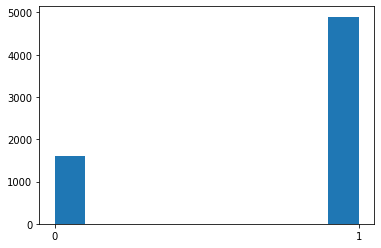

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
#5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())

In [ ]:
#데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [ ]:
#데이터 섞은 후 numpy array 로 변환
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
426        0.264463          0.086667     0.168675  ...  0.347826  0.500000   1.0
1268       0.256198          0.220000     0.186747  ...  0.217391  0.500000   0.0
2309       0.355372          0.133333     0.204819  ...  0.260870  0.500000   1.0
3656       0.272727          0.133333     0.168675  ...  0.608696  0.666667   1.0
4411       0.165289          0.146667     0.228916  ...  0.739130  0.666667   1.0

[5 rows x 13 columns]
[[0.26446281 0.08666667 0.1686747  0.12269939 0.05980066 0.125
  0.49539171 0.15982263 0.41085271 0.17977528 0.34782609 0.5
  1.        ]
 [0.25619835 0.22       0.18674699 0.02147239 0.11627907 0.06944444
  0.10368664 0.18449971 0.58139535 0.18539326 0.2173913  0.5
  0.        ]
 [0.3553719  0.13333333 0.20481928 0.0107362  0.04318937 0.03472222
  0.2764977  0.10044342 0.3255814  0.15730337 0.26086957 0.5
  1.        ]
 [0.27272727 0.13333333 0.1686747  0.12116564 0.03488372 0.08

In [ ]:
#train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int (len(wine_np) *0.8)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.26446281 0.08666667 0.1686747  0.12269939 0.05980066 0.125
 0.49539171 0.15982263 0.41085271 0.17977528 0.34782609 0.5       ]
1.0
[0.26446281 0.16       0.14457831 0.08588957 0.06478405 0.10416667
 0.51152074 0.16560632 0.39534884 0.2247191  0.20289855 0.5       ]
1.0
[0. 1.]
[0. 1.]


In [ ]:
#와인 데이터 셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


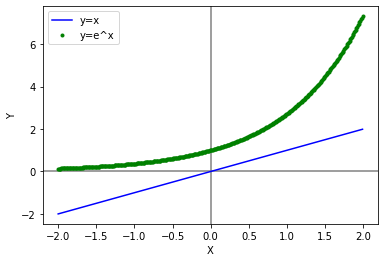

In [ ]:
#그림 출력 코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x,x,'b-', label='y=x')
plt.plot(x,e_x,'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9369 - val_loss: 0.0565 - val_accuracy: 0.9900
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9784 - val_loss: 0.0896 - val_accuracy: 0.9808
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9879 - val_loss: 0.0453 - val_accuracy: 0.9923
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9846 - val_loss: 0.0612 - val_accuracy: 0.9800
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9879 - val_loss: 0.0464 - val_accuracy: 0.9908
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9900 - val_loss: 0.0512 - val_accuracy: 0.9869
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0458 - accuracy: 0.9897 - val_loss: 0.0881 - val_accuracy: 0.9938
Epoch 

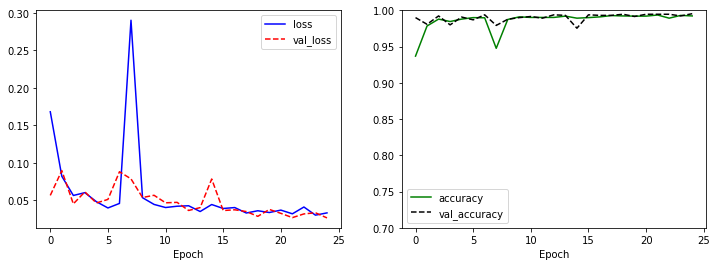

In [ ]:
#분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()


In [ ]:
#5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 909us/step - loss: 0.0167 - accuracy: 0.9969


[0.016665760427713394, 0.9969230890274048]

In [ ]:
#품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


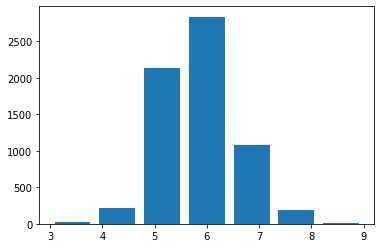

In [ ]:
# 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [ ]:
#품질을 3개의 범주(좋음 보통 나쁨으로 ) 재분류
wine.loc[wine['quality'] <=5, 'new_quality'] = 0
wine.loc[wine['quality'] ==6, 'new_quality'] = 1
wine.loc[wine['quality'] >=7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [ ]:
#와인 데이터셋의 다양한 분류 모델 생성 및 학습
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')

])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=25, batch_size=32,
                    validation_split=0.25)

Epoch 1/25


ValueError: ignored

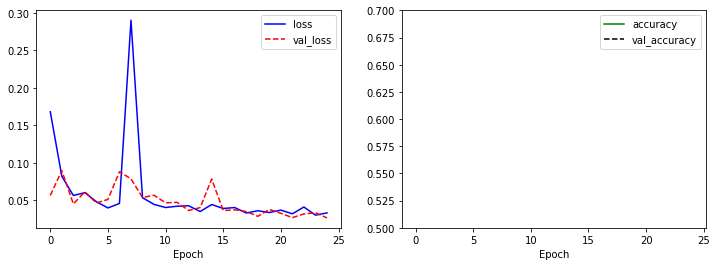

In [ ]:
#다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5,0.7)
plt.legend()

plt.show()

In [ ]:
#5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

ValueError: ignored

In [ ]:
#fashion_mnist
#필요 모듈 임포트
#tensorflow 와 tf.keras를 임포트

import tensorflow as tf
from tensorflow import keras

#1. 문제와 정답 데이터 지정
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#10개의 분류 이름 지정
class_names = ['T-shirt/top', 'Trouser','Pullober','Dress','Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

#데이터 전처리
# 샘플 값을 정수(0~255) 에서 부동소수(0~1)로 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Fashion MNIST 데이터 셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


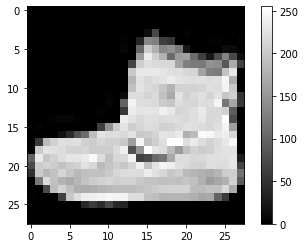

9


In [ ]:
#데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [ ]:
#10개의 분류 이름 ㅈ정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankie boot']

print(class_names[train_Y[0]])

Ankie boot


In [ ]:
#데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

#Fashion MNIST 분류 모델
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')

])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical', metrics=['accuracy'])

model.summary()

#fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25,validation_split=0.25)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

ValueError: ignored

In [ ]:
model.evaluate(test_X, test_Y)

ValueError: ignored

In [ ]:
#전반적인 통계도 확인
train_stats = train_dataset.describe()
print(train_stats)

NameError: ignored

In [ ]:
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats.head(9)

NameError: ignored

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

NameError: ignored

In [ ]:
def norm(x):
  return(x-train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.tail()

NameError: ignored

In [ ]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation='relu',input_shape=[len(train_dataset.keys())]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
  return model

  model = build_model()
  model.summary()

In [ ]:
example_batch = normed_tarin_data[:10]
example_result = model.predict(example_batch)
print(example_result)

NameError: ignored

In [ ]:
#1000번에포크 동안 훈련 // 에포크 중간 중간에점을 출력해 훈련 진행과정을 표시
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch %100 == 0: print('')
    print('.', end='')

EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs = EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks = [PrintDot()])

NameError: ignored

In [ ]:
#에포크가 끝날때마다 점을 출력 100번마다 다음줄로 이동해 훈련 진행과정을 표시한다.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()]
)

NameError: ignored

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

NameError: ignored

In [ ]:
def plot_history(history):
  hist['epoch']=history.epoch
  plt.figure(fig.size=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

SyntaxError: ignored

In [ ]:
model = build_mode()

#patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

NameError: ignored

In [ ]:
loss,mae,mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

NameError: ignored

In [ ]:
test_predictions = model.predice(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.xlabel('predictions [MPG]')
plt.axis('equal') #각축의 범위와 축의 스케일을 동일하게 설정
plt.axis('square') #각 축의 범위를 xmax - xmin = ymax- ymin이 되도록 설정
print(plt.xlim()[1])
plt.xlim([0, plt.xlim()[1]])
print(plt.ylim()[1])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100, 100], [-100, 100], c='7')

NameError: ignored

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_=plt.ylabel("Count")

NameError: ignored

In [1]:
# 5.5  데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

NameError: ignored

In [3]:
#5.6 데이터 섞은 후 numpy array로 변환
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

NameError: ignored

In [5]:
#5.7 train 데이터와 test 데이터 분리
import tensorflow as tf
train_idx = int(len(wine_up) * 0.8)

train_X, train_Y = wine_np[:train_idx,:-1], wine_np[:train_idx,-1]
test_X, test_Y = wine_np[:train_idx,:-1], wine_np[:train_idx,-1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

NameError: ignored

In [6]:
y =  [0,1,2,3]
tf.keras.utils.to_categorical(y, num_classes=4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [7]:
#5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


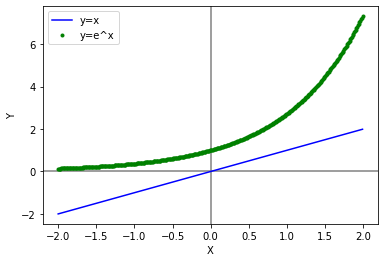

In [8]:
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2,2,0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x,x,'b-', label='y=x')
plt.plot(x,e_x,'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [9]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

NameError: ignored

NameError: ignored

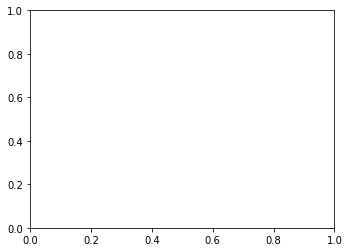

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()


In [11]:
model.evaluate(test_X, test_Y)

NameError: ignored

In [13]:
#5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

NameError: ignored

In [14]:
#5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bias=7, rwidth=0.8)
plt.show()

NameError: ignored

In [16]:
#5.14 품질을 3개의 범주 (좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

NameError: ignored

In [19]:
#5.15 데이터 정규화 및 train, test, 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np)*0.8)
train_X, train_Y = wine_np[train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils. to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

NameError: ignored

In [20]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_spli=0.25)

NameError: ignored

NameError: ignored

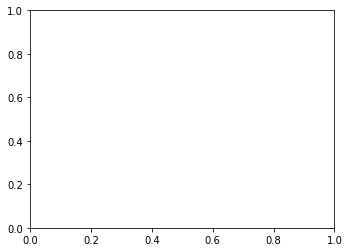

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

In [22]:
#필요 모듈 임포트
#tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

#1 문제와 정답 데이터 지정
fashion_mnist = keras.datasets.fashion_mnist.load_data()
#10개의 분류 이름 지정
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag', 'Ankle boot']

#데이터 전처리
#샘플 값을 정수에서 부동소수로 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


NameError: ignored

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


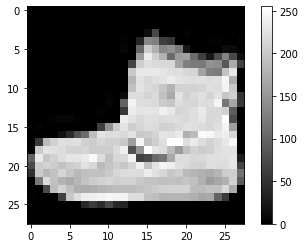

9


In [24]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(class_names[train_Y[0]])

Ankle boot


In [26]:
#5.21 데이터 정규화
train_X = train_X /255.0
test_X = test_X / 255.0

print(train_X[0])

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_spli=0.25)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

TypeError: ignored

In [27]:
model.evaluate(test_X, test_Y)

ValueError: ignored